In [1]:
!pip install

Defaulting to user installation because normal site-packages is not writeable
ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df_train = pd.read_csv("twitter_training.csv")
df_valid = pd.read_csv("twitter_validation.csv")

df_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
df_valid

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
print(df_train.columns)
print(df_valid.columns)

df_train["id"] = df_train["2401"]
df_train["topic"] = df_train["Borderlands"]
df_train["sentiment"] = df_train["Positive"]
df_train["tweet"] = df_train["im getting on borderlands and i will murder you all ,"]
df_valid["id"] = df_valid["3364"]
df_valid["topic"] = df_valid["Facebook"]
df_valid["sentiment"] = df_valid["Irrelevant"]
df_valid["tweet"] = df_valid["I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"]

df_valid = df_valid.drop(columns = ["3364", "Facebook", "Irrelevant", "I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"])
df_train = df_train.drop(columns = ["2401", "Borderlands", "Positive", "im getting on borderlands and i will murder you all ,"])

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


In [5]:
df_train

,id,topic,sentiment,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
df_valid

,id,topic,sentiment,tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [7]:
for i in df_train.columns:
    print(df_train[i].value_counts())

id
9200    6
9199    6
2402    6
2403    6
2404    6
       ..
2435    6
2436    6
2437    6
2438    6
2401    5
Name: count, Length: 12447, dtype: int64
topic
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310


In [8]:
le = LabelEncoder()

df_train["topic"] = le.fit_transform(df_train["topic"])
df_valid["topic"] = le.fit_transform(df_valid["topic"])
df_train["sentiment"] = le.fit_transform(df_train["sentiment"])
df_valid["sentiment"] = le.fit_transform(df_valid["sentiment"])

df_train

,id,topic,sentiment,tweet
0,2401,4,3,I am coming to the borders and I will kill you...
1,2401,4,3,im getting on borderlands and i will kill you ...
2,2401,4,3,im coming on borderlands and i will murder you...
3,2401,4,3,im getting on borderlands 2 and i will murder ...
4,2401,4,3,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,21,3,Just realized that the Windows partition of my...
74677,9200,21,3,Just realized that my Mac window partition is ...
74678,9200,21,3,Just realized the windows partition of my Mac ...
74679,9200,21,3,Just realized between the windows partition of...


In [9]:
df_valid

,id,topic,sentiment,tweet
0,352,0,2,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,19,1,@Microsoft Why do I pay for WORD when it funct...
2,4371,5,1,"CSGO matchmaking is so full of closet hacking,..."
3,4433,13,2,Now the President is slapping Americans in the...
4,6273,10,1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,14,0,⭐️ Toronto is the arts and culture capital of ...
995,4359,5,0,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,4,3,Today sucked so it’s time to drink wine n play...
997,8069,19,3,Bought a fraction of Microsoft today. Small wins.


In [10]:
df_train = df_train[df_train['tweet'].str.len()!=0]
df_valid = df_valid[df_valid['tweet'].str.len()!=0]
df_train

,id,topic,sentiment,tweet
0,2401,4,3,I am coming to the borders and I will kill you...
1,2401,4,3,im getting on borderlands and i will kill you ...
2,2401,4,3,im coming on borderlands and i will murder you...
3,2401,4,3,im getting on borderlands 2 and i will murder ...
4,2401,4,3,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,21,3,Just realized that the Windows partition of my...
74677,9200,21,3,Just realized that my Mac window partition is ...
74678,9200,21,3,Just realized the windows partition of my Mac ...
74679,9200,21,3,Just realized between the windows partition of...


In [11]:
df_valid

,id,topic,sentiment,tweet
0,352,0,2,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,19,1,@Microsoft Why do I pay for WORD when it funct...
2,4371,5,1,"CSGO matchmaking is so full of closet hacking,..."
3,4433,13,2,Now the President is slapping Americans in the...
4,6273,10,1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,14,0,⭐️ Toronto is the arts and culture capital of ...
995,4359,5,0,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,4,3,Today sucked so it’s time to drink wine n play...
997,8069,19,3,Bought a fraction of Microsoft today. Small wins.


In [12]:
print(df_train.isnull().sum())
print(df_valid.isnull().sum())

id             0
topic          0
sentiment      0
tweet        686
dtype: int64
id           0
topic        0
sentiment    0
tweet        0
dtype: int64


In [13]:
df_train = df_train.dropna()

df_train

,id,topic,sentiment,tweet
0,2401,4,3,I am coming to the borders and I will kill you...
1,2401,4,3,im getting on borderlands and i will kill you ...
2,2401,4,3,im coming on borderlands and i will murder you...
3,2401,4,3,im getting on borderlands 2 and i will murder ...
4,2401,4,3,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,21,3,Just realized that the Windows partition of my...
74677,9200,21,3,Just realized that my Mac window partition is ...
74678,9200,21,3,Just realized the windows partition of my Mac ...
74679,9200,21,3,Just realized between the windows partition of...


In [14]:
df_train['tweet'] = df_train['tweet'].astype(str)
df_train['tweet'] = df_train['tweet'].str.lower()
df_valid['tweet'] = df_valid['tweet'].astype(str)
df_valid['tweet'] = df_valid['tweet'].str.lower()

print(df_train['tweet'])
df_train.head()

0        i am coming to the borders and i will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    just realized that the windows partition of my...
74677    just realized that my mac window partition is ...
74678    just realized the windows partition of my mac ...
74679    just realized between the windows partition of...
74680    just like the windows partition of my mac is l...
Name: tweet, Length: 73995, dtype: object


/tmp/ipykernel_78833/3994482541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['tweet'] = df_train['tweet'].astype(str)
/tmp/ipykernel_78833/3994482541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['tweet'] = df_train['tweet'].str.lower()


,id,topic,sentiment,tweet
0,2401,4,3,i am coming to the borders and i will kill you...
1,2401,4,3,im getting on borderlands and i will kill you ...
2,2401,4,3,im coming on borderlands and i will murder you...
3,2401,4,3,im getting on borderlands 2 and i will murder ...
4,2401,4,3,im getting into borderlands and i can murder y...


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_text_train = [' '.join([stemmer.stem(word) for word in nltk.word_tokenize(sentence)]) for sentence in df_train["tweet"]]
stemmed_text_valid = [' '.join([stemmer.stem(word) for word in nltk.word_tokenize(sentence)]) for sentence in df_valid["tweet"]]

# Tokenization and lemmatization
lemmatized_text_train = [' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sentence)]) for sentence in stemmed_text_train]
lemmatized_text_valid = [' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sentence)]) for sentence in stemmed_text_valid]


stop_words = set(stopwords.words('english'))

filtered_sentences_train = []
for sentence in lemmatized_text_train:
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    # Filter out stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a sentence
    filtered_sentence = ' '.join(filtered_words)
    # Add filtered sentence to the list
    filtered_sentences_train.append(filtered_sentence)

filtered_sentences_valid = []
for sentence in lemmatized_text_valid:
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    # Filter out stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a sentence
    filtered_sentence = ' '.join(filtered_words)
    # Add filtered sentence to the list
    filtered_sentences_valid.append(filtered_sentence)
    
df_train["tweet"] = filtered_sentences_train
df_valid["tweet"] = filtered_sentences_valid

[nltk_data] Downloading package punkt to /home/afraz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/afraz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/afraz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_78833/1335468998.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["tweet"] = filtered_sentences_train


In [16]:
df_train

,id,topic,sentiment,tweet
0,2401,4,3,"come border kill ,"
1,2401,4,3,"im get borderland kill ,"
2,2401,4,3,"im come borderland murder ,"
3,2401,4,3,"im get borderland 2 murder ,"
4,2401,4,3,"im get borderland murder ,"
...,...,...,...,...
74676,9200,21,3,realiz window partit mac like 6 year behind nv...
74677,9200,21,3,realiz mac window partit 6 year behind nvidia ...
74678,9200,21,3,realiz window partit mac 6 year behind nvidia ...
74679,9200,21,3,realiz window partit mac like 6 year behind nv...


In [17]:
df_valid

,id,topic,sentiment,tweet
0,352,0,2,bbc news - amazon bos jeff bezo reject claim c...
1,8312,19,1,@ microsoft whi pay word function poorli @ sam...
2,4371,5,1,"csgo matchmak full closet hack , 's truli aw g..."
3,4433,13,2,presid slap american face realli commit unlaw ...
4,6273,10,1,hi @ eahelp ’ madelein mccann cellar past 13 y...
...,...,...,...,...
994,4891,14,0,"⭐️ toronto art cultur capit canada , ’ wonder ..."
995,4359,5,0,thi actual good move tot bring viewer . wa one...
996,2652,4,3,today suck ’ time drink wine n play borderland...
997,8069,19,3,bought fraction microsoft today . small win .


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()

X_train = vectorizer.fit_transform(df_train["tweet"])
x_test = vectorizer.transform(df_valid["tweet"])

print(X_train.shape)
print(x_test.shape)

(73995, 25355)
(999, 25355)


In [19]:
print(X_train[0].shape)

(1, 25355)


Multinomial Naive Bayes Classifier:
Accuracy: 0.7787787787787788
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.58      0.73       171
           1       0.68      0.90      0.77       266
           2       0.87      0.69      0.77       285
           3       0.76      0.88      0.81       277

    accuracy                           0.78       999
   macro avg       0.82      0.76      0.77       999
weighted avg       0.81      0.78      0.78       999



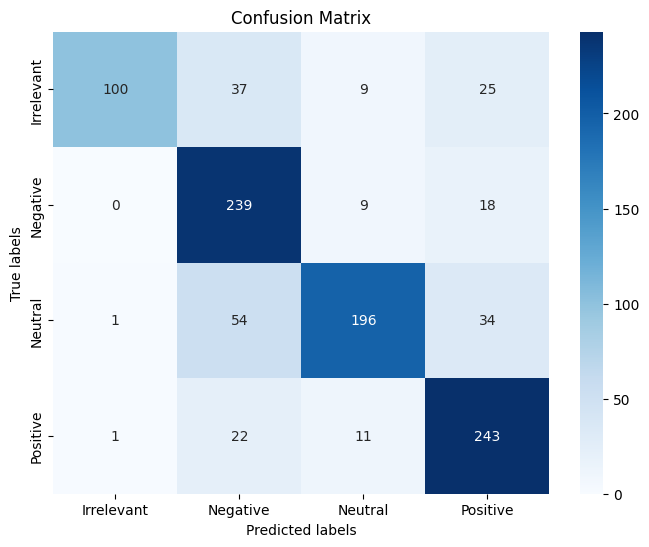


Logistic Regression Classifier:
Accuracy: 0.9009009009009009
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       171
           1       0.87      0.93      0.90       266
           2       0.93      0.89      0.91       285
           3       0.89      0.91      0.90       277

    accuracy                           0.90       999
   macro avg       0.90      0.90      0.90       999
weighted avg       0.90      0.90      0.90       999



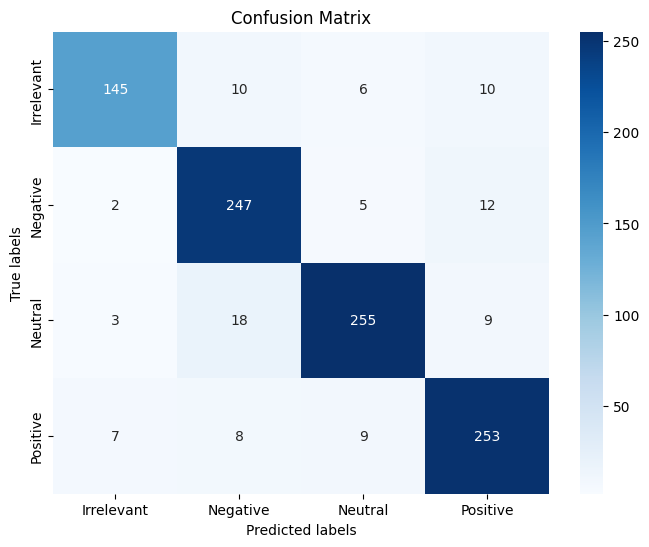


Decision Tree Classifier:
Accuracy: 0.8898898898898899
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       171
           1       0.87      0.94      0.90       266
           2       0.90      0.87      0.89       285
           3       0.89      0.88      0.89       277

    accuracy                           0.89       999
   macro avg       0.89      0.89      0.89       999
weighted avg       0.89      0.89      0.89       999



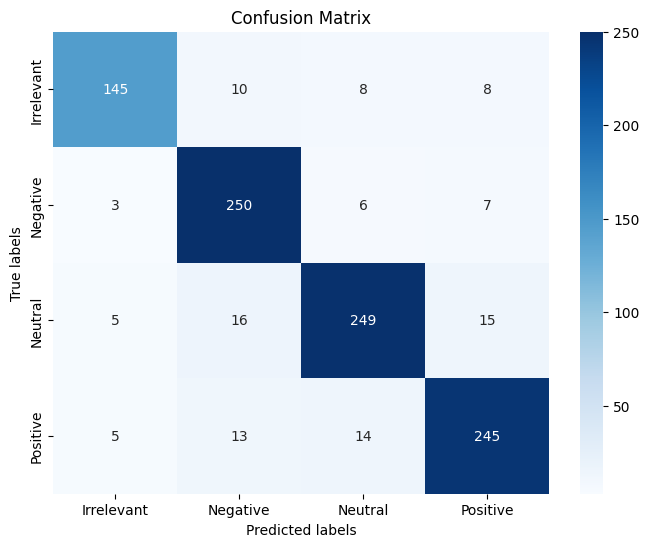


Random Forest Classifier:
Accuracy: 0.9459459459459459
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.94       171
           1       0.95      0.97      0.96       266
           2       0.93      0.95      0.94       285
           3       0.94      0.95      0.94       277

    accuracy                           0.95       999
   macro avg       0.95      0.94      0.95       999
weighted avg       0.95      0.95      0.95       999



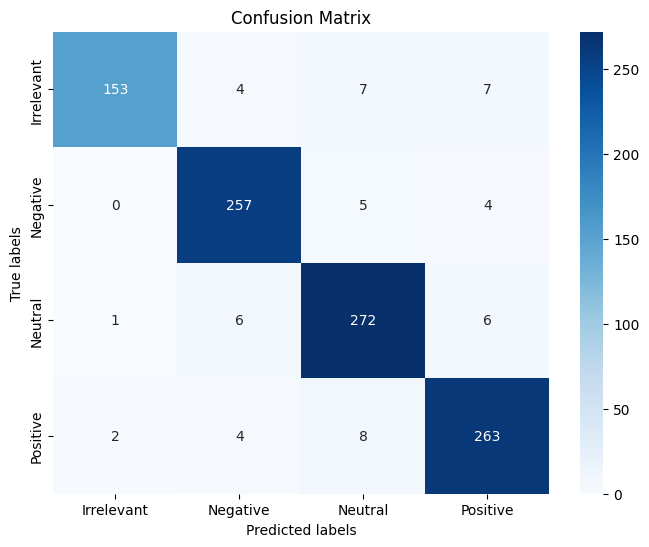

In [22]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, df_train["sentiment"])
nb_pred = nb_classifier.predict(x_test)
print("Multinomial Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(df_valid["sentiment"], nb_pred))
print("Classification Report:")
print(classification_report(df_valid["sentiment"], nb_pred))
cm = confusion_matrix(df_valid["sentiment"], nb_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Irrelevant', 'Negative', 'Neutral', 'Positive'], yticklabels=['Irrelevant', 'Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter = 1000)
lr_classifier.fit(X_train, df_train["sentiment"])
lr_pred = lr_classifier.predict(x_test)
print("\nLogistic Regression Classifier:")
print("Accuracy:", accuracy_score(df_valid["sentiment"], lr_pred))
print("Classification Report:")
print(classification_report(df_valid["sentiment"], lr_pred))
cm = confusion_matrix(df_valid["sentiment"], lr_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Irrelevant', 'Negative', 'Neutral', 'Positive'], yticklabels=['Irrelevant', 'Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Machine classifier
#svm_classifier = SVC()
#svm_classifier.fit(X_train, df_train["sentiment"])
#svm_pred = svm_classifier.predict(x_test)
#print("\nSupport Vector Machine Classifier:")
#print("Accuracy:", accuracy_score(df_valid["sentiment"], svm_pred))
#print("Classification Report:")
#print(classification_report(df_valid["sentiment"], svm_pred))

# Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, df_train["sentiment"])
dt_pred = dt_classifier.predict(x_test)
print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(df_valid["sentiment"], dt_pred))
print("Classification Report:")
print(classification_report(df_valid["sentiment"], dt_pred))
cm = confusion_matrix(df_valid["sentiment"], dt_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Irrelevant', 'Negative', 'Neutral', 'Positive'], yticklabels=['Irrelevant', 'Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, df_train["sentiment"])
rf_pred = rf_classifier.predict(x_test)
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(df_valid["sentiment"], rf_pred))
print("Classification Report:")
print(classification_report(df_valid["sentiment"], rf_pred))
cm = confusion_matrix(df_valid["sentiment"], rf_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Irrelevant', 'Negative', 'Neutral', 'Positive'], yticklabels=['Irrelevant', 'Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
print("Hello World")

Hello World
